Enter number of elements :  4
 Tennis
 Cricket
 Football
 Rugby


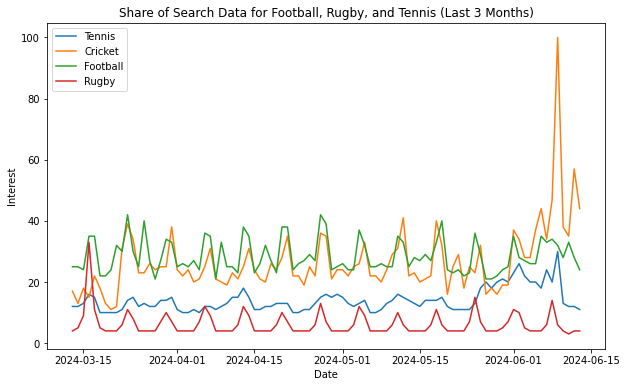

In [22]:
# Python application that visualises the Share of search data for 3 terms [Football, Rugby and Tennis]
# 13-Jun-2024    - VRP - Initial Version
# 13-Jun-2024    - VRP - Minor Changes to the Initial Version

# Import the libraries that will be used in the Project/Program
import pandas as pd                       # pandas library               
import matplotlib.pyplot as plt           # matplotlib library that will help us create the graphs
from pytrends.request import TrendReq     # pytrends - is an API that will allows simple interface for automating the reports.

# Initialize pytrends
pytrends = TrendReq(hl='en-UK', tz=360)

# Define the search terms
# creating an empty list
lst = []
 
# number of elements as input
n = int(input("Enter number of elements : "))
 
# iterating till the range
for i in range(0, n):
    ele = input()
    # adding the element
    lst.append(ele) 

#search_data_terms = ["Football", "Rugby", "Tennis"]
search_data_terms = lst

# Set the timeframe for the past 3 months
timeframe = 'today 3-m'

# Build the payload
# we can give a particular country in geo, we can search only UK as UK-ENG
pytrends.build_payload(search_data_terms, cat=0, timeframe=timeframe, geo='', gprop='')

# Get interest over time
final_data = pytrends.interest_over_time()

# Drop the 'isPartial' column
final_data = final_data.drop(columns=['isPartial'])

# Plot the data
plt.figure(figsize=(10, 6))

for term in search_data_terms:
    plt.plot(final_data.index, final_data[term], label=term)

plt.title('Share of Search Data for Football, Rugby, and Tennis (Last 3 Months)')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.show()